In [1]:
%matplotlib inline
import numpy as np
import h5py
from matplotlib import pyplot as plt
import os
from IPython.display import clear_output, display
#from alvra_tools import *

#### Load the image

In [2]:
#f = h5py.File('/sf/alvra/data/p17982/raw/camera_test/run_000001.BSREAD.h5_SARES11-XMI125-C4P1.h5')
#f = h5py.File('/sf/alvra/data/p17982/raw/jet_test_100mbar/run_000045.BSREAD.h5_SARES11-XMI125-C4P1.h5')
#f = h5py.File('/sf/alvra/data/p17982/raw/OCP_300fs_dark/run_000112.BSREAD.h5_SARES11-XMI125-C4P1.h5')
#f = h5py.File('/sf/alvra/data/p17982/raw/camera_test_10hz/run_000158.BSREAD.h5_SARES11-XMI125-C4P1.h5')
#f = h5py.File('/sf/alvra/data/p17982/raw/OCP_2a_LCP_300fs_1uJ/run_000184.BSREAD.h5_SARES11-XMI125-C4P1.h5')

#f = h5py.File('/sf/alvra/data/p17982/raw/OCP_2a_LCP_300fs_1uJ/run_000229.BSREAD.h5_SARES11-XMI125-C4P1.h5')
f = h5py.File('/sf/alvra/data/p17982/raw/OCP_2a_LCP_dark/run_000307.BSREAD.h5_SARES11-XMI125-C4P1.h5')


#f2 = h5py.File('/sf/alvra/data/p17982/raw/test_cam/run_000132.BSREAD.h5')
#pulse_id = np.array(f2['data/SAR-CVME-TIFALL4:EvtSet/pulse_id'])
pulse_id = np.array(f['data/SARES11-XMI125-C4P1:FPICTURE/pulse_id'])
#image = np.array(f['data/SARES11-XMI125-C4P1:FPICTURE/data'][:,:,:])
images = np.array(f['data/SARES11-XMI125-C4P1:FPICTURE/data'])
#xyz = np.array(f['data/SARES11-XMI125-C4P1:FPICTURE/data'][:,:,:])

print (images.shape)

(981, 1024, 1280)


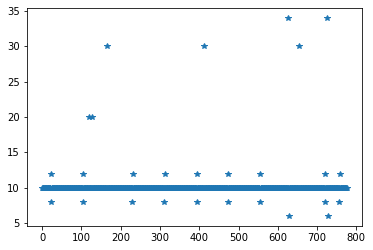

In [233]:
plt.plot(np.abs(pulse_id[1:777]-pulse_id[2:778]),'*') # greg changed here

#### Display image

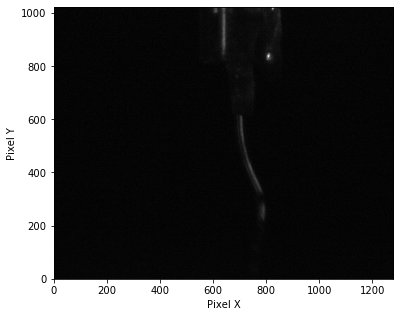

In [3]:
image2display = images[0,:,:]

plt.figure(figsize=(10,5))
plt.imshow(image2display, cmap='gray', interpolation='none', origin= 'lower')#,vmax=300)
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

#### Rotate the image 180 deg using for loops

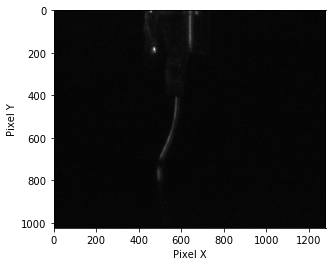

In [4]:
h,w = image2display.shape
empty_img = np.zeros([h,w], dtype=np.uint8)

for i in range(h):
    for j in range(w):
        empty_img[i,j] = image2display[h-i-1,w-j-1]
        empty_img = empty_img[0:h,0:w]
        
        
#plt.imshow(image, cmap='gray')
plt.imshow(empty_img, cmap='gray')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

#### Rotate the image using numpy.flip() and resize it

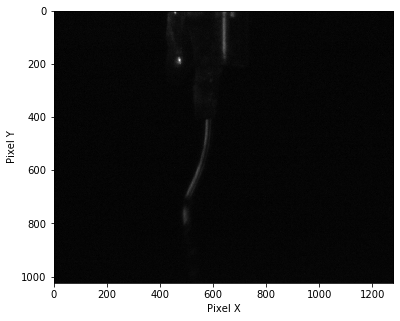

In [5]:
img_p = np.flip(image2display)
plt.figure(figsize=(10,5))
plt.imshow(img_p, cmap='gray')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

#### Display image without interpolation and with origin "lower" 

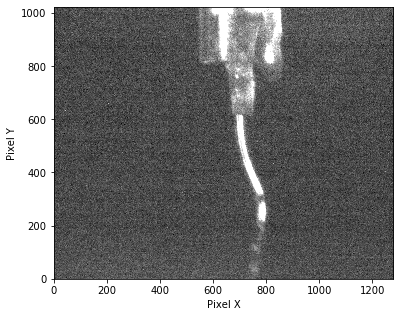

In [6]:
plt.figure(figsize=(10,5))
plt.imshow(image2display, cmap='gray', interpolation='none', origin= 'lower',vmax=20)
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

### Loop to sort light / dark runs

In [75]:
DIR = "/sf/alvra/data/p17982/raw/OCP_2a_LCP_300fs_1uJ/"
#DIR = "/sf/alvra/data/p17807/raw/THz/"

!ls -lah -rt $DIR | grep BSREAD.h5_

!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files / 2," BSREAD files in the folder", DIR)

-rw-r--r--.  1 root p17982  736 Nov  2 18:50 run_000183.BSREAD.h5_SARES11-XMI125-C4P1.h5.err
-rw-r--r--.  1 root p17982  736 Nov  2 18:54 run_000184.BSREAD.h5_SARES11-XMI125-C4P1.h5.err
-rw-r--r--.  1 root p17982  736 Nov  2 18:57 run_000185.BSREAD.h5_SARES11-XMI125-C4P1.h5.err
-rw-r--r--.  1 root p17982  736 Nov  2 19:01 run_000186.BSREAD.h5_SARES11-XMI125-C4P1.h5.err
-rw-r--r--.  1 root p17982  736 Nov  2 19:04 run_000187.BSREAD.h5_SARES11-XMI125-C4P1.h5.err
-rw-r--r--.  1 root p17982  736 Nov  2 19:08 run_000188.BSREAD.h5_SARES11-XMI125-C4P1.h5.err
-rw-r--r--.  1 root p17982  736 Nov  2 19:11 run_000189.BSREAD.h5_SARES11-XMI125-C4P1.h5.err
-rw-r--r--.  1 root p17982 4.9G Nov  2 19:13 run_000184.BSREAD.h5_SARES11-XMI125-C4P1.h5
-rw-r--r--.  1 root p17982 4.9G Nov  2 19:19 run_000188.BSREAD.h5_SARES11-XMI125-C4P1.h5
-rw-r--r--.  1 root p17982 4.8G Nov  2 19:36 run_000183.BSREAD.h5_SARES11-XMI125-C4P1.h5
-rw-r--r--.  1 root p17982 4.9G Nov  2 19:42 run_000185.BSREAD.h5_SARES11-XMI125-C

ra-c-002.psi.ch
There are 335.0  BSREAD files in the folder /sf/alvra/data/p17982/raw/OCP_2a_LCP_300fs_1uJ/


In [168]:
start_index = 183
number_files = 200
nframes = 10

intensity = []
run_number = []

for i in range(start_index,start_index + number_files):
    fileName = DIR + "run_000" + str(i) + ".BSREAD.h5_SARES11-XMI125-C4P1.h5"
    exists = os.path.isfile(fileName)
    if exists:
        run_number.append(i)
        clear_output(wait=True)
        print ('Processing', fileName)
        f = h5py.File(fileName)
        pulse_id = np.array(f['data/SARES11-XMI125-C4P1:FPICTURE/pulse_id'])
        images = np.array(f['data/SARES11-XMI125-C4P1:FPICTURE/data'])
        imagestack = 0
        #for j in range(nframes):
        #    image = images[j][:,:]
        #    imagesum += image
        imagestack = np.amax(images, axis = 0)
        intensity.append(np.sum(imagestack))
        print (np.sum(imagestack))
        
        
intensity = np.asarray(intensity)
run_number = np.asarray(run_number)

Processing /sf/alvra/data/p17982/raw/OCP_2a_LCP_300fs_1uJ/run_000368.BSREAD.h5_SARES11-XMI125-C4P1.h5
29001329


In [169]:
intensity_light = intensity.copy()

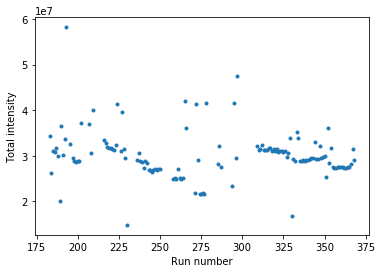

In [249]:
plt.figure()
plt.plot(run_number,intensity_light,'.')
plt.xlabel ('Run number')
plt.ylabel ('Total intensity')
plt.show()

In [137]:
images.shape

(990, 1024, 1280)

In [165]:
#image2display = image[178,1:600,700:800]
image2display = images[0,:,:]
print (images.shape)
imagestack = np.amax(images, axis = 0)
print (imagestack.shape)
#sum_image = np.sum(image2display,1)

(981, 1024, 1280)
(1024, 1280)


In [135]:
nframes = 10
imagesum = 0
for i in range(nframes):
    image = images[i][:,:]
    image_intensity=np.max(image)
    
    imagestack = np.stack(image, axis=0)

### Check for individual runs

Text(0, 0.5, 'Max intensity')

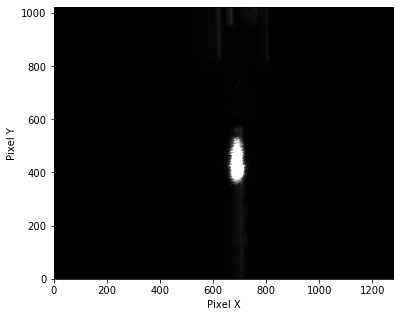

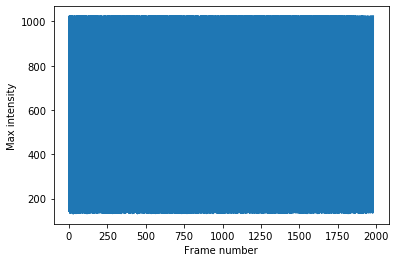

In [5]:
f = h5py.File('/sf/alvra/data/p17982/raw/OCP_5a_LCP_1p5ps_0p2uJ/run_000458.BSREAD.h5_SARES11-XMI125-C4P1.h5')
images = np.array(f['data/SARES11-XMI125-C4P1:FPICTURE/data'])

max_intensity=np.zeros(len(images))
for i in range(len(images)):
    max_intensity[i]=np.max(images[i])
    
imagestack = np.amax(images, axis = 0)

plt.figure(figsize=(10,5))
plt.imshow(imagestack, cmap='gray', interpolation='none', origin= 'lower')#,vmax=300)
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.figure()
plt.plot(max_intensity)
plt.xlabel('Frame number')
plt.ylabel('Max intensity')


In [27]:
def conv_exp_gauss(x,a,b,c,d,e):
    A_fun = 1/(d*np.sqrt(2*np.pi))*np.exp(-((-x+c)**2)/(2*d**2))
    B_fun = np.heaviside((-x+c),0)*np.exp(-(-x+c)/e)   
    return  a + b*np.convolve(A_fun,B_fun,'same')

